# Lasso Regression 

In [4]:
import sklearn.model_selection as skm
(X_train, X_test, y_train, y_test) = skm.train_test_split(data.drop(['log_price','price'], axis=1),
                                                          data['log_price'],
                                                          test_size=0.2,
                                                          random_state=0)

In [5]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from matplotlib.pyplot import subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from ISLP.models import ModelSpec as MS

In [6]:
K=5
kfold = skm.KFold(K, random_state=0, shuffle=True)

In [7]:
X_train = X_train.iloc[:,1:]
X_test = X_test.iloc[:,1:]

In [9]:
scaler = StandardScaler(with_mean=True, with_std=True)

In [10]:
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1, 
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
pipeCV.fit(X_train, y_train)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

0.0005678305304899897

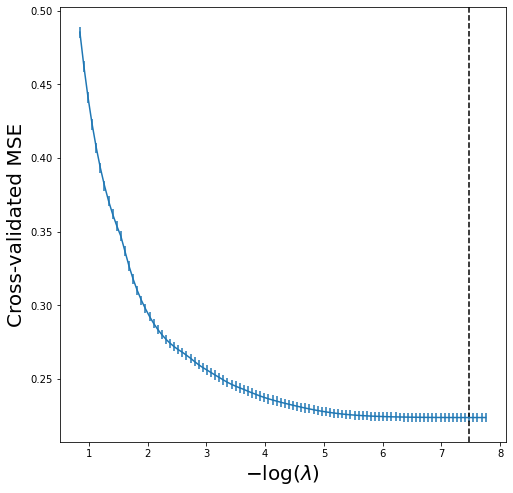

In [14]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
tuned_lasso.mse_path_.mean(1),
yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [11]:
lasso = skl.ElasticNet(alpha=tuned_lasso.alpha_, l1_ratio=1)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)]) 
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', ElasticNet(alpha=0.0005678305304899897, l1_ratio=1))])

In [12]:
test_pred = pipe.predict(X_test)
np.mean((y_test - test_pred)**2)

0.22753221424556327

In [13]:
test_pred = pipe.predict(X_train)
np.mean((y_train - test_pred)**2)

0.22041227770401764